<a href="https://colab.research.google.com/github/MZKhan-111/Time_Series/blob/main/Time_SERIES_BITCOIN_PRICE_PRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-527ac068-0847-107c-a117-e78d96dacbb8)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/ETH-USD.csv',
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2163 entries, 2017-11-09 to 2023-10-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2163 non-null   float64
 1   High       2163 non-null   float64
 2   Low        2163 non-null   float64
 3   Close      2163 non-null   float64
 4   Adj Close  2163 non-null   float64
 5   Volume     2163 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 118.3 KB


In [ ]:
len(df)

2163

<Axes: xlabel='Date'>

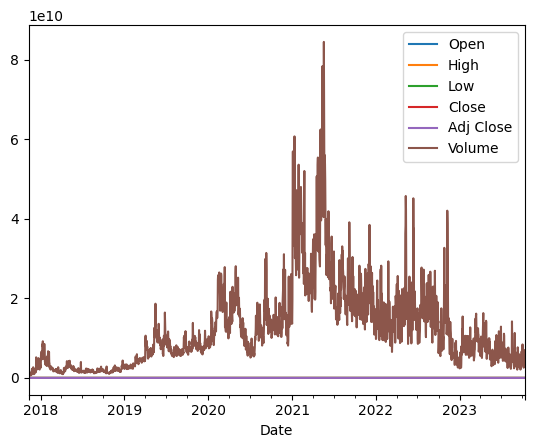

In [ ]:
df.plot()

In [ ]:
# Only want closing price for each day
eth_prices = pd.DataFrame(df["Close"]).rename(columns={"Closing Price (USD)": "Price"})
eth_prices.head()

,Close
Date,
2017-11-09,320.884003
2017-11-10,299.252991
2017-11-11,314.681000
2017-11-12,307.907990
2017-11-13,316.716003


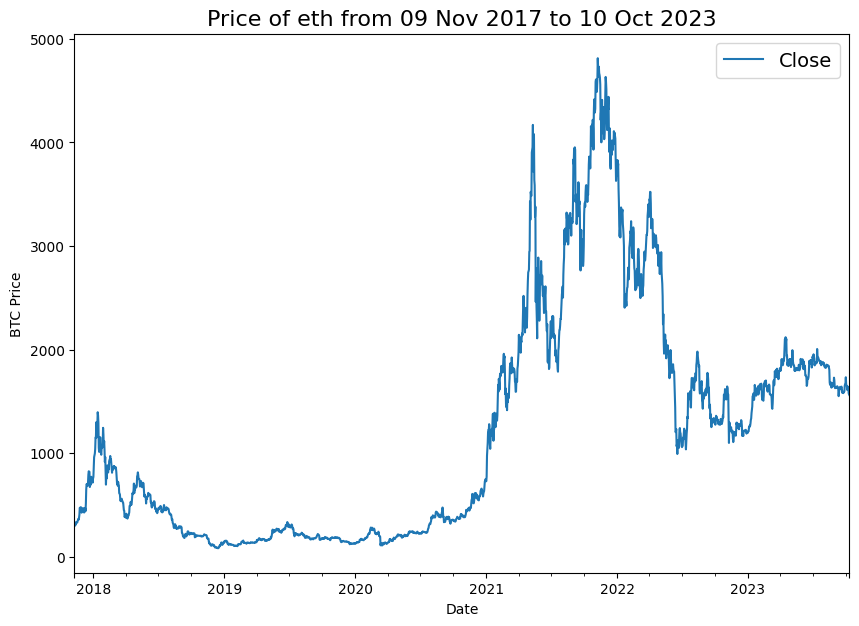

In [ ]:
eth_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of eth from 09 Nov 2017 to 10 Oct 2023", fontsize=16)
plt.legend(fontsize=14);

# Format Data Part 1: Creatining train and test sets for time series data


# Create train & test sets for time series

In [ ]:
# Get bitcoin date array
timesteps = eth_prices.index.to_numpy()
prices = eth_prices["Close"].to_numpy()

timesteps[:10], prices[:10]

(array(['2017-11-09T00:00:00.000000000', '2017-11-10T00:00:00.000000000',
        '2017-11-11T00:00:00.000000000', '2017-11-12T00:00:00.000000000',
        '2017-11-13T00:00:00.000000000', '2017-11-14T00:00:00.000000000',
        '2017-11-15T00:00:00.000000000', '2017-11-16T00:00:00.000000000',
        '2017-11-17T00:00:00.000000000', '2017-11-18T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([320.884003, 299.252991, 314.681   , 307.90799 , 316.716003,
        337.631012, 333.356995, 330.924011, 332.394012, 347.612   ]))

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test, to have the rpice trend int he dataset

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1730, 433, 1730, 433)

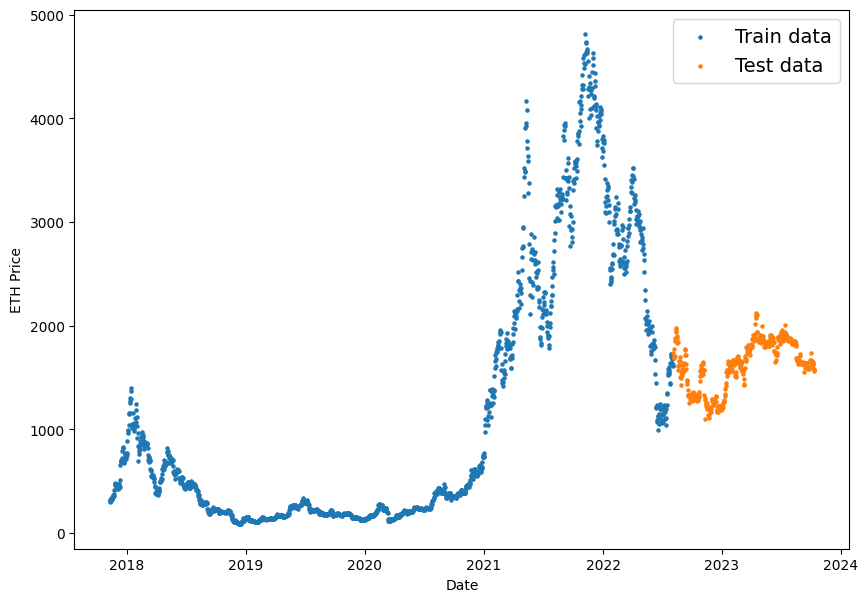

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("ETH Price")
plt.legend(fontsize=14)
plt.show();

# Creating plotting function

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("ETH Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

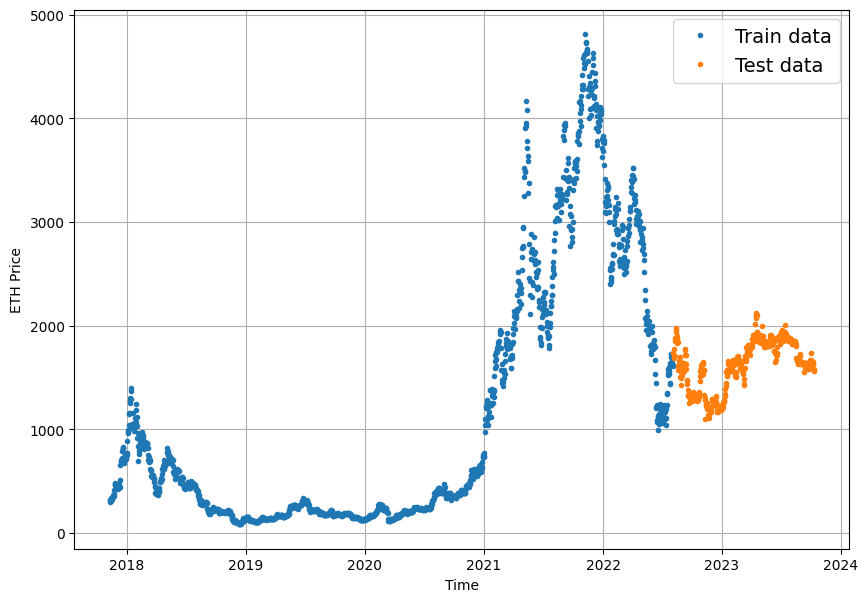

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [ ]:
# # Load your dataset using Pandas
# bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Closing Price (USD)": "Price"})
# # Plot your data using Seaborn and Matplotlib
# sns.set_theme()
# sns.lineplot(x="Date", y="Close", data=bitcoin_prices)
# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.title("Bitcoin Price Over Time")
# plt.xticks(rotation=45)
# plt.show()

# Modelling Experiments

# Model 0: Naïve forecast (baseline)

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([1732.254639, 1691.658081, 1699.35083 , 1775.516113, 1703.025024,
        1851.742676, 1881.224121, 1957.24646 , 1981.336548, 1936.802002]),
 array([1733.810425, 1663.627563, 1656.685669, 1647.838135, 1611.47644 ,
        1645.831543, 1634.51123 , 1633.548584, 1579.806641, 1567.713013]))

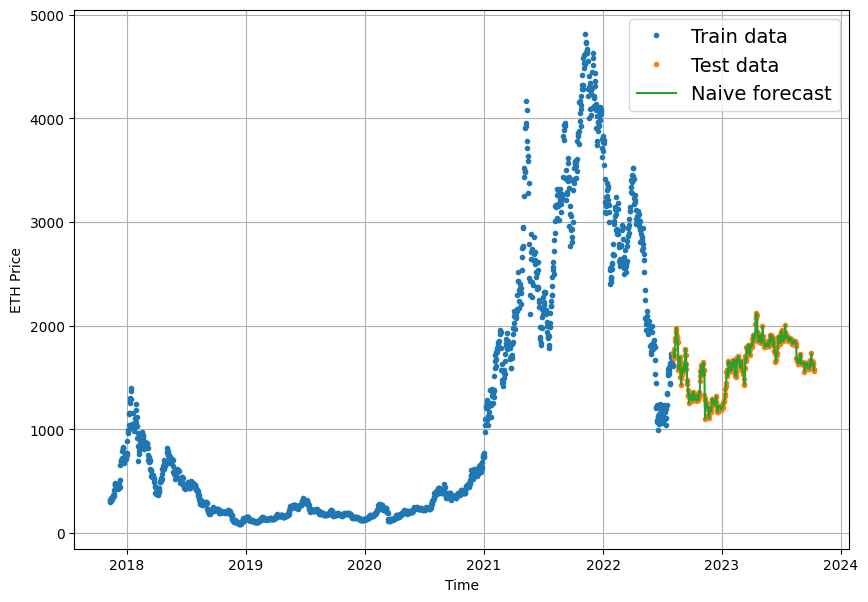

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

The naive forecast looks like it's following the data well.

Let's zoom in to take a better look.

We can do so by creating an offset value and passing it to the start parameter of our plot_time_series() function.

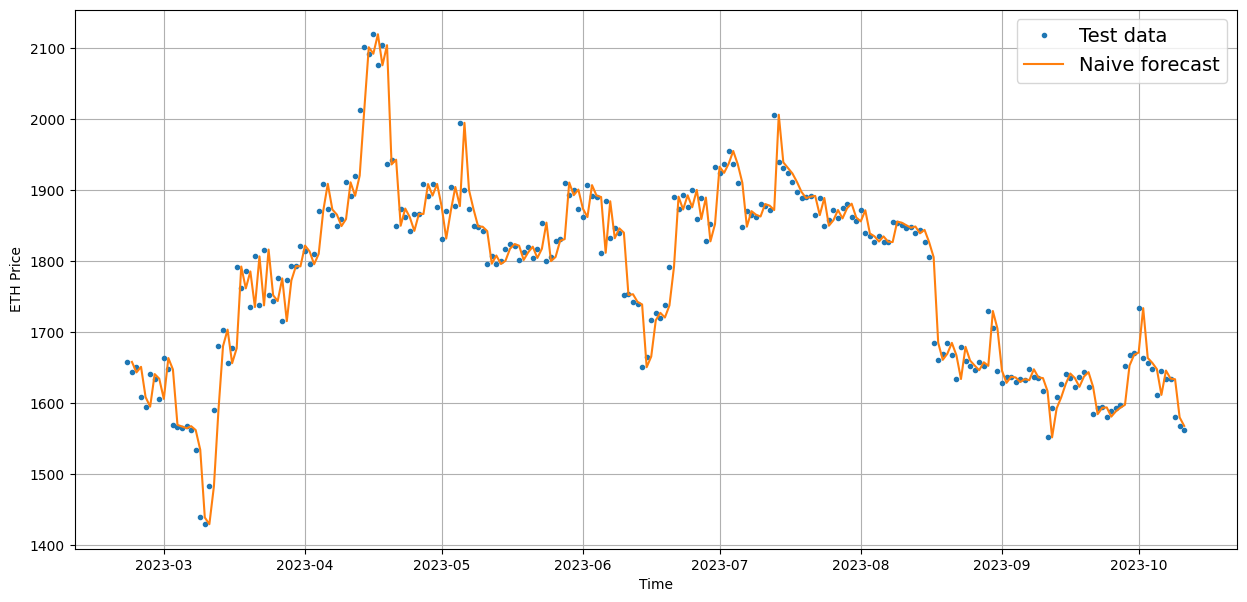

In [ ]:
plt.figure(figsize=(15, 7))
offset = 200 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

# Evaluating a time series model


Time series forecasting often involves predicting a number (in our case, the price of Bitcoin).

And what kind of problem is predicting a number?

Ten points if you said regression.

With this known, we can use regression evaluation metrics to evaluate our time series forecasts.

The main thing we will be evaluating is: how do our model's predictions (y_pred) compare against the actual values (y_true or ground truth values)?

📖 Resource: We're going to be using several metrics to evaluate our different model's time series forecast accuracy. Many of them are sourced and explained mathematically and conceptually in Forecasting: Principles and Practice chapter 5.8, I'd recommend reading through here for a more in-depth overview of what we're going to practice.

For all of the following metrics, lower is better (for example an MAE of 0 is better than an MAE 100).

Scale-dependent errors
These are metrics which can be used to compare time series values and forecasts that are on the same scale.

For example, Bitcoin historical prices in USD veresus Bitcoin forecast values in USD.

Metric	Details	Code
MAE (mean absolute error)	Easy to interpret (a forecast is X amount different from actual amount). Forecast methods which minimises the MAE will lead to forecasts of the median.	tf.keras.metrics.mean_absolute_error()
RMSE (root mean square error)	Forecasts which minimise the RMSE lead to forecasts of the mean.	tf.sqrt(tf.keras.metrics.mean_square_error())
Percentage errors
Percentage errors do not have units, this means they can be used to compare forecasts across different datasets.

Metric	Details	Code
MAPE (mean absolute percentage error)	Most commonly used percentage error. May explode (not work) if y=0.	tf.keras.metrics.mean_absolute_percentage_error()
sMAPE (symmetric mean absolute percentage error)	Recommended not to be used by Forecasting: Principles and Practice, though it is used in forecasting competitions.	Custom implementation
Scaled errors
Scaled errors are an alternative to percentage errors when comparing forecast performance across different time series.

Metric	Details	Code
MASE (mean absolute scaled error).	MASE equals one for the naive forecast (or very close to one). A forecast which performs better than the naïve should get <1 MASE.	See sktime's mase_loss()
🤔 Question: There are so many metrics... which one should I pay most attention to? It's going to depend on your problem. However, since its ease of interpretation (you can explain it in a sentence to your grandma), MAE is often a very good place to start.

Since we're going to be evaluing a lot of models, let's write a function to help us calculate evaluation metrics on their forecasts.

First we'll need TensorFlow.

In [ ]:
# Let's get TensorFlow!
import tensorflow as tf

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season


Let's put each of our different evaluation metrics together into a function.

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 32.629253,
 'mse': 2364.623,
 'rmse': 48.62739,
 'mape': 2.0595942,
 'mase': 1.0005668}

# Format Data Part 2: Windowing dataset

Windowing is a method to turn a time series dataset into supervised learning problem.

In other words, we want to use windows of the past to predict the future.

For example for a univariate time series, windowing for one week (window=7) to predict the next single value (horizon=1) might look like:

Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]

[1, 2, 3, 4, 5, 6, 7] -> [8]

[2, 3, 4, 5, 6, 7, 8] -> [9]


In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

Now we'll write a function to take in an array and turn it into a window and horizon.

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:,-horizon:]

In [ ]:
# # Test out the window labelling function
# test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
# print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels


In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2156, 2156)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [320.884003 299.252991 314.681    307.90799  316.716003 337.631012
 333.356995] -> Label: [330.924011]
Window: [299.252991 314.681    307.90799  316.716003 337.631012 333.356995
 330.924011] -> Label: [332.394012]
Window: [314.681    307.90799  316.716003 337.631012 333.356995 330.924011
 332.394012] -> Label: [347.612]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [1663.627563 1656.685669 1647.838135 1611.47644  1645.831543 1634.51123
 1633.548584] -> Label: [1579.806641]
Window: [1656.685669 1647.838135 1611.47644  1645.831543 1634.51123  1633.548584
 1579.806641] -> Label: [1567.713013]
Window: [1647.838135 1611.47644  1645.831543 1634.51123  1633.548584 1579.806641
 1567.713013] -> Label: [1561.448608]


# Turning windows into training and test sets

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1724, 432, 1724, 432)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[320.884003, 299.252991, 314.681   , 307.90799 , 316.716003,
         337.631012, 333.356995],
        [299.252991, 314.681   , 307.90799 , 316.716003, 337.631012,
         333.356995, 330.924011],
        [314.681   , 307.90799 , 316.716003, 337.631012, 333.356995,
         330.924011, 332.394012],
        [307.90799 , 316.716003, 337.631012, 333.356995, 330.924011,
         332.394012, 347.612   ],
        [316.716003, 337.631012, 333.356995, 330.924011, 332.394012,
         347.612   , 354.385986]]),
 array([[330.924011],
        [332.394012],
        [347.612   ],
        [354.385986],
        [366.730011]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

# Make a modelling checkpoint

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

# Model 1: Dense model (window = 7, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save

Epoch 1/100
14/14 [==============================] - 6s 51ms/step - loss: 95.9246 - mae: 95.9246 - val_loss: 76.9071 - val_mae: 76.9071
Epoch 2/100
14/14 [==============================] - 0s 33ms/step - loss: 71.2102 - mae: 71.2102 - val_loss: 49.6994 - val_mae: 49.6994
Epoch 3/100
14/14 [==============================] - 0s 31ms/step - loss: 64.5672 - mae: 64.5672 - val_loss: 46.8102 - val_mae: 46.8102
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 60.0846 - mae: 60.0846 - val_loss: 54.7119 - val_mae: 54.7119
Epoch 5/100
14/14 [==============================] - 0s 32ms/step - loss: 59.1050 - mae: 59.1050 - val_loss: 42.6260 - val_mae: 42.6260
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 55.5692 - mae: 55.5692 - val_loss: 43.9531 - val_mae: 43.9531
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 55.5874 - mae: 55.5874 - val_loss: 44.5495 - val_mae: 44.5495
Epoch 8/100
14/14 [==============================] 

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

14/14 [==============================] - 0s 5ms/step - loss: 37.5385 - mae: 37.5385


[37.53845977783203, 37.53845977783203]

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

14/14 [==============================] - 0s 6ms/step - loss: 32.7535 - mae: 32.7535


[32.75349426269531, 32.75349426269531]

# Making forecasts with a model (on the test dataset)

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

14/14 [==============================] - 0s 2ms/step


(432,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1713.1013, 1694.8577, 1705.1969, 1756.3336, 1712.3445, 1846.9648,
        1868.8438, 1959.4703, 1985.0026, 1936.7042], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 32.753494,
 'mse': 2345.4456,
 'rmse': 48.4298,
 'mape': 2.073628,
 'mase': 1.0043766}

In [ ]:
naive_results

{'mae': 32.629253,
 'mse': 2364.623,
 'rmse': 48.62739,
 'mape': 2.0595942,
 'mase': 1.0005668}

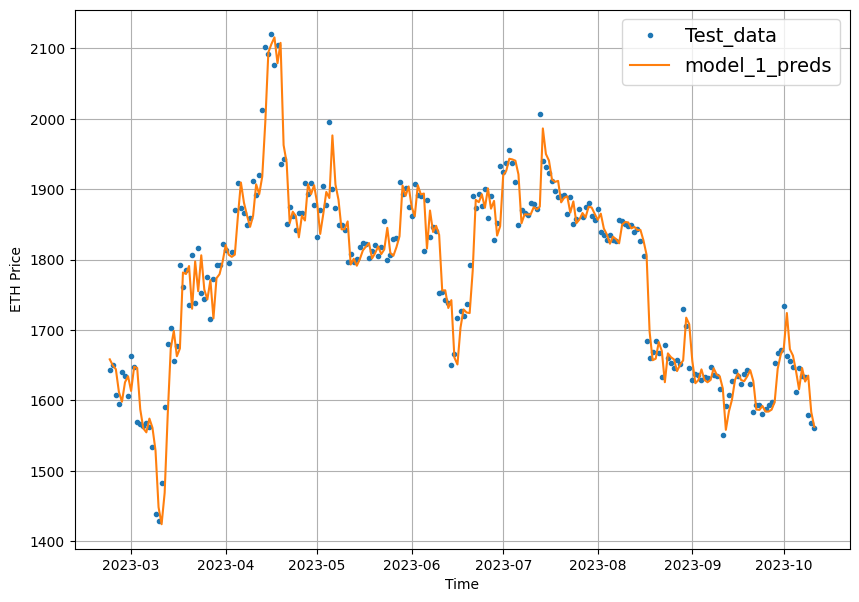

In [ ]:
offset = 200
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")